In [153]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
import seaborn as sns
import scipy.stats as stats
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.decomposition import PCA as sklearn_pca
import locale
from locale import atof
import warnings
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_selection import f_regression
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import xlrd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestClassifier

In [154]:
#Load data form excel spreadsheet into pandas
xls_file = pd.ExcelFile('D:\\Users\\Borja.gonzalez\\Desktop\\Thinkful-DataScience-Borja\\resultados_personality_insights_v0.2.xlsx')

# View the excel file's sheet names
#xls_file.sheet_names

# Load the xls file's 14tbl08ny as a dataframe
person = xls_file.parse('Raw Data')
person.head()

,folder,file,word_count,processed_language,big5_openness_raw_score,big5_openness__facet_adventurousness_raw_score,big5_openness__facet_artistic_interests_raw_score,big5_openness__facet_emotionality_raw_score,big5_openness__facet_imagination_raw_score,big5_openness__facet_intellect_raw_score,...,need_love_raw_score,need_practicality_raw_score,need_self_expression_raw_score,need_stability_raw_score,need_structure_raw_score,value_conservation_raw_score,value_openness_to_change_raw_score,value_hedonism_raw_score,value_self_enhancement_raw_score,value_self_transcendence_raw_score
0,BCDM,BCDM Essay #1.docx,1037.0,en,0.784474,0.552340,0.723263,0.688233,0.744498,0.731954,...,0.722490,0.688515,0.621080,0.732718,0.730330,0.668267,0.796639,0.632937,0.674912,0.834175
1,BCDM,BCDM Essay #10.docx,944.0,en,0.771121,0.545828,0.779554,0.739122,0.784990,0.769389,...,0.810111,0.683229,0.637034,0.732972,0.701467,0.622341,0.799327,0.661351,0.679099,0.849262
2,BCDM,BCDM Essay #11.docx,1109.0,en,0.821584,0.526137,0.769487,0.762700,0.805796,0.766390,...,0.802418,0.696390,0.683699,0.741340,0.702538,0.608368,0.819925,0.644431,0.634194,0.849675
3,BCDM,BCDM Essay #12.docx,1398.0,en,0.765794,0.448368,0.683062,0.729064,0.732648,0.675948,...,0.812411,0.674062,0.632017,0.762876,0.698028,0.643144,0.742352,0.674282,0.632661,0.842662
4,BCDM,BCDM Essay #13.docx,985.0,en,0.814402,0.545682,0.742526,0.688421,0.772085,0.770653,...,0.721496,0.696977,0.645380,0.684512,0.699831,0.569484,0.817540,0.647659,0.648155,0.836181


In [155]:
person = person[:-9]
person.tail()

,folder,file,word_count,processed_language,big5_openness_raw_score,big5_openness__facet_adventurousness_raw_score,big5_openness__facet_artistic_interests_raw_score,big5_openness__facet_emotionality_raw_score,big5_openness__facet_imagination_raw_score,big5_openness__facet_intellect_raw_score,...,need_love_raw_score,need_practicality_raw_score,need_self_expression_raw_score,need_stability_raw_score,need_structure_raw_score,value_conservation_raw_score,value_openness_to_change_raw_score,value_hedonism_raw_score,value_self_enhancement_raw_score,value_self_transcendence_raw_score
212,TDHR,TDHR Essay #5.docx,1164.0,en,0.784142,0.571794,0.654346,0.621485,0.723117,0.737616,...,0.743371,0.713913,0.616218,0.736226,0.749601,0.617243,0.803430,0.626427,0.674647,0.833964
213,TDHR,TDHR Essay #6.docx,1841.0,en,0.797916,0.531801,0.740805,0.702944,0.731774,0.763092,...,0.722096,0.669997,0.601237,0.736552,0.726431,0.631269,0.766601,0.587490,0.648672,0.839953
214,TDHR,TDHR Essay #7.pdf,599.0,en,0.801086,0.562731,0.614591,0.556978,0.674139,0.688987,...,0.717358,0.720633,0.607210,0.713225,0.711345,0.583818,0.794607,0.615938,0.681913,0.802872
215,TDHR,TDHR Essay #8.docx,1083.0,en,0.828846,0.555455,0.763287,0.690920,0.803990,0.773501,...,0.767748,0.704486,0.669404,0.693312,0.692027,0.594143,0.821815,0.626897,0.662800,0.837475
216,TDHR,TDHR Essay #9.docx,518.0,en,0.860767,0.520779,0.808049,0.638710,0.830613,0.768699,...,0.645866,0.674787,0.590121,0.680510,0.692115,0.567373,0.792367,0.587199,0.635510,0.807051


In [156]:
person.folder.unique()

array(['BCDM', 'BIS', 'EMCC', 'EXMPLS', 'GMBD', 'MBD', 'MCC', 'MCS',
       'MCXI', 'MRCB', 'MVDM', 'TDHR'], dtype=object)

In [157]:
# Check quality of the information

person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 56 columns):
folder                                                          217 non-null object
file                                                            217 non-null object
word_count                                                      217 non-null float64
processed_language                                              217 non-null object
big5_openness_raw_score                                         217 non-null float64
big5_openness__facet_adventurousness_raw_score                  217 non-null float64
big5_openness__facet_artistic_interests_raw_score               217 non-null float64
big5_openness__facet_emotionality_raw_score                     217 non-null float64
big5_openness__facet_imagination_raw_score                      217 non-null float64
big5_openness__facet_intellect_raw_score                        217 non-null float64
big5_openness__facet_liberalism_raw_score       

In [158]:
person1 = person[['folder','word_count','big5_openness_raw_score','big5_conscientiousness_raw_score','big5_extraversion_raw_score','big5_agreeableness_raw_score','big5_neuroticism_raw_score']]
#Describe the dataset
person1

,folder,word_count,big5_openness_raw_score,big5_conscientiousness_raw_score,big5_extraversion_raw_score,big5_agreeableness_raw_score,big5_neuroticism_raw_score
0,BCDM,1037.0,0.784474,0.647777,0.507292,0.705867,0.472964
1,BCDM,944.0,0.771121,0.574128,0.501644,0.741771,0.422941
2,BCDM,1109.0,0.821584,0.598315,0.494727,0.750020,0.401171
3,BCDM,1398.0,0.765794,0.591388,0.512185,0.772154,0.445388
4,BCDM,985.0,0.814402,0.616285,0.501854,0.716395,0.464840
5,BCDM,650.0,0.830572,0.578275,0.489811,0.678850,0.371156
6,BCDM,956.0,0.784986,0.657518,0.467775,0.670573,0.471771
7,BCDM,555.0,0.853094,0.655600,0.522446,0.703827,0.493167
8,BCDM,702.0,0.793103,0.614618,0.549806,0.747433,0.482147
9,BCDM,568.0,0.826836,0.576928,0.509567,0.751530,0.439642


In [159]:
#Scaling all features

# Select only numeric variables to scale.
df = person1.select_dtypes(include=[np.number]).dropna()

# Save the column names.
names = df.columns

# Scale, then turn the resulting numpy array back into a data frame with the correct column names.
df_scaled = pd.DataFrame(preprocessing.scale(df), columns=names)

# Lookit all those matching means and standard deviations!
df_scaled.head()

,word_count,big5_openness_raw_score,big5_conscientiousness_raw_score,big5_extraversion_raw_score,big5_agreeableness_raw_score,big5_neuroticism_raw_score
0,0.050025,-1.189772,0.653134,-1.138976,0.753642,-0.437386
1,-0.134604,-1.848076,-2.354997,-1.317098,1.987142,-1.946366
2,0.192963,0.639677,-1.367108,-1.535213,2.270529,-2.603088
3,0.766700,-2.110693,-1.650030,-0.984659,3.030965,-1.269245
4,-0.053208,0.285630,-0.633140,-1.310452,1.115322,-0.682455


In [160]:
person2= df_scaled.rename(columns={'big5_openness_raw_score': 'big5_openness_scaled',
                                 'big5_conscientiousness_raw_score': 'big5_conscientiousness_scaled',
                                 'big5_extraversion_raw_score':'big5_extraversion_scaled',
                                 'big5_agreeableness_raw_score': 'big5_agreeableness_scaled',
                                 'big5_neuroticism_raw_score':'big5_neuroticism_scaled'
                                })
person2.head()

,word_count,big5_openness_scaled,big5_conscientiousness_scaled,big5_extraversion_scaled,big5_agreeableness_scaled,big5_neuroticism_scaled
0,0.050025,-1.189772,0.653134,-1.138976,0.753642,-0.437386
1,-0.134604,-1.848076,-2.354997,-1.317098,1.987142,-1.946366
2,0.192963,0.639677,-1.367108,-1.535213,2.270529,-2.603088
3,0.766700,-2.110693,-1.650030,-0.984659,3.030965,-1.269245
4,-0.053208,0.285630,-0.633140,-1.310452,1.115322,-0.682455


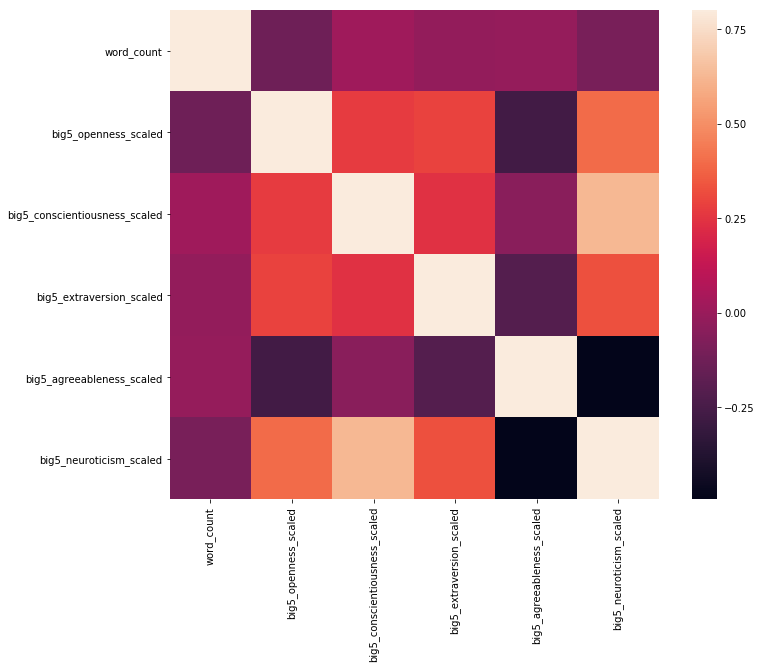

In [161]:
# Make the correlation matrix.
correlation_matrix = person2.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(correlation_matrix, vmax=.8, square=True)
plt.show()

In [162]:
#Eigenvectores & Eigenvalues

eig_vals, eig_vecs = np.linalg.eig(correlation_matrix)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_vals)):
    eigvecs = eig_vecs[:, i].reshape(1, len(person2.columns)).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvecs))
    print('Eigenvalue {}: {}'.format(i + 1, eig_vals[i]))
    print(40 * '-')


sklearn_pca = PCA(n_components=len(person2.columns))
Y_sklearn = sklearn_pca.fit_transform(correlation_matrix)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

Eigenvector 1: 
[[-0.07910804]
 [ 0.42973135]
 [ 0.43986724]
 [ 0.37821307]
 [-0.37474999]
 [ 0.57628727]]
Eigenvalue 1: 2.3277045474505345
----------------------------------------
Eigenvector 2: 
[[ 0.10681784]
 [-0.01398469]
 [-0.54387073]
 [-0.01824947]
 [ 0.41424768]
 [ 0.72157108]]
Eigenvalue 2: 0.21289857044447305
----------------------------------------
Eigenvector 3: 
[[-0.2530512 ]
 [-0.83910785]
 [ 0.05236615]
 [ 0.41463868]
 [-0.16966073]
 [ 0.16855532]]
Eigenvalue 3: 0.665670550115972
----------------------------------------
Eigenvector 4: 
[[ 0.94401633]
 [-0.22181736]
 [ 0.22631285]
 [ 0.05766409]
 [-0.04607966]
 [ 0.05444487]]
Eigenvalue 4: 1.0273766555370096
----------------------------------------
Eigenvector 5: 
[[-0.13793165]
 [-0.08300486]
 [ 0.64247332]
 [-0.05973448]
 [ 0.74305045]
 [ 0.07497273]]
Eigenvalue 5: 0.961292341936451
----------------------------------------
Eigenvector 6: 
[[-0.09002774]
 [-0.23439425]
 [ 0.20973733]
 [-0.82328807]
 [-0.32392783]
 [ 0.

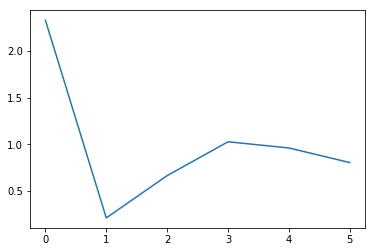

In [163]:
#From the Scree plot.

plt.plot(eig_vals)
plt.show()

In [164]:
y = person1['folder']
X = person2[['word_count','big5_openness_scaled','big5_conscientiousness_scaled','big5_extraversion_scaled','big5_agreeableness_scaled',
             'big5_neuroticism_scaled']]

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

In [166]:
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train, y_train)

In [167]:
print ("Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(y_train, mul_lr.predict(X_train)))
print ("Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, mul_lr.predict(X_test)))

Multinomial Logistic regression Train Accuracy ::  0.53488372093
Multinomial Logistic regression Test Accuracy ::  0.0977011494253


In [168]:
y = pd.factorize(y_train)[0]

array([ 0,  1,  2,  1,  0,  3,  4,  1,  4,  5,  3,  6,  7,  3,  7,  6,  4,
        8,  7,  7,  5,  3,  7,  8,  3,  8,  0,  1,  9, 10,  6,  7,  6,  0,
        5, 11,  6,  1,  7,  1,  2,  0,  3], dtype=int64)

In [169]:

clf = RandomForestClassifier(n_jobs=11, random_state=0)

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=11,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

AttributeError: 'numpy.ndarray' object has no attribute 'prob'